In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.signal as sps
import pickle
# from datetime import datetime as dt
import datetime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib as mpl
import h5py as h5
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import csv
import os
import warnings
import scipy as sp
from scipy.optimize import curve_fit
import itertools
# %matplotlib notebook
sns.set()
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
sns.set(font_scale=2)
SPY = 365.25*24*3600

In [44]:
sb=True
if sb:
    sns.set()
    sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 1.5})
#     sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.set_style("whitegrid",{"xtick.top":True, "xtick.bottom":True,"ytick.left":True, "ytick.right":True})
# plt.style.use('seaborn-notebook')

# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams.update({'figure.autolayout': True})
fontsz = 20
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams["axes.labelsize"] = 22
plt.rcParams['figure.figsize'] = [10, 8]
palette = sns.color_palette()

In [45]:
def k_log(L,kL,x0,xa,d,ic):
    denom = 1 + np.exp(-kL*(xa - x0))
    return L/denom + d*xa + ic 

def k_log_cf(xa,L,kL,os,rhoc):
    denom = 1 + np.exp(-kL*(xa - rhoc))
    return L/denom + os

def k_log_cf_d(xa,L,kL,os,d,rhoc):
    denom = 1 + np.exp(-kL*(xa - rhoc))
    return L/denom + d*xa + os

In [142]:
run SP_PotsandTherm_new.py

/Users/maxstev/Documents/Grad_School/Research/SouthPole/SP_PotsandTherm_new.py:287: RuntimeWarning: divide by zero encountered in true_divide
  viscosity = 0.5 * stress_holebot[ii]/strain_rate
/Users/maxstev/Documents/Grad_School/Research/SouthPole/SP_PotsandTherm_new.py:288: RuntimeWarning: divide by zero encountered in true_divide
  viscosity_unfilt = 0.5 * stress_holebot[ii]/strain_rate_unfilt


In [143]:
run visc_rho_age.py

In [233]:
### load model results  
# thenames = ['HLdynamic','Ligtenberg2011','Li2015','Crocus','GSFC2020','MaxSP','Goujon2003']
thenames = ['HLdynamic','Ligtenberg2011','Li2015','Crocus','GSFC2020','MaxSP']
# thenames = ['MaxSP']
# thenames = ['Li2015','MaxSP','Li15B']
d = {}
d['SP50']={}
d['SP50']['MET']={}
fdate = '220825'
for ii,name in enumerate(thenames):
    with open('/Volumes/FirnSSD/CFMresults/USP50_{}/CFM_data_SP50_{}_{}.pkl'.format(fdate,fdate,name),'rb') as f:
#     with open('/Volumes/FirnSSD/CFMresults/USP50200306/CFM_data_SP50_200306_{}.pkl'.format(name),'rb') as f:
        dtemp=pickle.load(f)
        d['SP50']['MET'].update(dtemp['SP50']['MET'])
        d['SP50']['MET'][name]['rdaily']['temp_trun'] = d['SP50']['MET'][name]['rdaily']['temperature'][:,::20]
        d['SP50']['MET'][name]['rdaily']['dep_trun'] = d['SP50']['MET'][name]['rdaily']['depth'][:,::20]
        d['SP50']['MET'][name]['rdaily']['visc_trun'] = d['SP50']['MET'][name]['rdaily']['viscosity'][:,::20]
#         d[site][datasource][name][fil]['depth'] = np.tile(d[site][datasource][name][fil]['depth'],(len(d[site][datasource][name][fil]['time']),1))

In [145]:
# df14D = dfp6.resample('14D').median()
diff_visc = df_dc.filter(regex='visc').copy()

<AxesSubplot:xlabel='TIMESTAMP'>

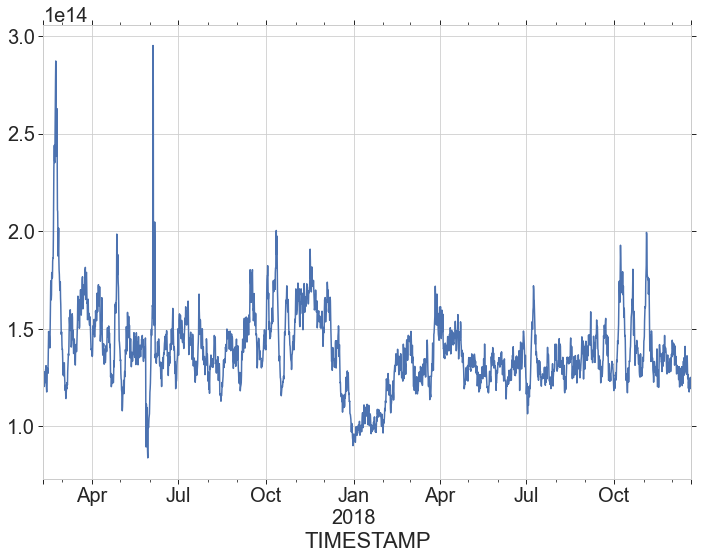

In [146]:
diff_visc.viscosity12_11.plot()

In [147]:
### top and bottom depths of virtual holes
# htda = [0.25,0.25,4.40,4.42,4.40,4.42,9.750,9.650,9.75,9.65,14.65,15.10,19.53,24.85,29.82,40.16,80.0]
# hbda = [4.40,4.42,9.75,9.75,9.65,9.65,14.65,14.65,15.1,15.1,19.53,19.53,24.85,29.82,40.16,80.00,106.0]

In [149]:
midpoints = (np.array(hbda)+np.array(htda))/2
resamp = '1W'
df_re_ts=df_dc.resample('1d').mean().index

In [151]:
np.gradient(dfp4['strain12'],deltat)

array([-1.04532608e-09, -1.04346727e-09, -1.04130588e-09, ...,
       -4.07333620e-10, -4.07782952e-10, -4.09798731e-10])

In [152]:
'''
TEMPERATURE STUFF
In the SP_model notebook, I took the daily precip records, 1/1/2017 - 12/31/18.
Converted to snow with density 300. 2017 gave ~30 cm of snow, so used that.
2018 also gave ~30 cm, so multiplied the precip values by 1.8 to get a total around 60 cm (observed)
These values are then used to adjust the depth of the thermistors.
'''
dft_monthly = dft5[df_re_ts[0]:df_re_ts[-1]].resample(resamp).mean()
n_grid = np.linspace(0,41,329) #165
temps_m = dft_monthly.values
tm_m = dft_monthly.index.values
ro_m, co_m = np.shape(temps_m)
depths1_m = np.tile(tdeps.astype(float),(ro_m,1))
hc1 = pd.read_pickle('HeightChange.pkl') 
hc_m = hc1.resample(resamp).mean()
depth_adder_m = np.tile(hc_m.values,(co_m,1)).T
depth_adder_m = depth_adder_m*1.1
depths_m = depths1_m #+ depth_adder_m
t_interp_m = np.zeros((ro_m,len(n_grid)))
for kkk in range(ro_m): #put the measured temperatures on the grid
    tif = sp.interpolate.interp1d(depths_m[kkk,:],temps_m[kkk,:],bounds_error=False,fill_value="extrapolate")
    t_interp_m[kkk,:]= tif(n_grid)
dataT_m = t_interp_m.T

In [153]:
z1a = 'agemax'
z2a = 'agemax'
z1r = 'rhomean'
z2r = 'rhomean'
Q=-60e3
n1=1.0
n2 = 1.0

In [154]:
### zone 1
hole_no = [0,1,12,11,10,9,5]
h_ordz1 = np.array([1,12,11,11,10,10,9,9,5,5])
holediff_tops = htda[0:10]
holediff_bots = hbda[0:10]
dcsv1 = ['1','12','1_11','12_11','1_10','12_10','11_9','10_9','11_5','10_5']
z1_diff_meanrho = np.array(rmeanlist)[0:10]
z1_diff_maxrho = np.array(rmaxlist)[0:10]
z1_diff_meanage = np.array(ameanlist)[0:10]
z1_diff_maxage = np.array(amaxlist)[0:10]
n_grid = np.linspace(0,41,329) #165
dvisc_monthly = diff_visc.resample(resamp).median().interpolate()
v1_dict={}
for jj, hdi in enumerate(dcsv1):
    i_up = np.where(n_grid >= holediff_tops[jj])[0][0]
    i_down = np.where(n_grid <= holediff_bots[jj])[0][-1]
    t_hold = np.mean(dataT_m[i_up:i_down+1,:],axis=0)+273.15
    v1_dict[dcsv1[jj]] = pd.DataFrame({'holenum':hdi,'dep':holediff_bots[jj]*np.ones_like(t_hold),'agemean':z1_diff_meanage[jj]*np.ones_like(t_hold),'agemax':z1_diff_maxage[jj]*np.ones_like(t_hold),'visc':dvisc_monthly['viscosity{}'.format(dcsv1[jj])].values,'rhomean':z1_diff_meanrho[jj],'rhomax':z1_diff_maxrho[jj],'T':t_hold,'stress':dfp4['stress_holebot{}'.format(h_ordz1[jj])].mean()})      
z1v_df=pd.concat(v1_dict.values(), ignore_index=True)
z1v_df['rhoU'] = z1v_df[z1r] #rho to use
z1v_df['ageU'] = z1v_df[z1a]*SPY
tsl = len(z1v_df[z1v_df.holenum=='1']) #time series length

#option to drop certain data
z1drop = False
if z1drop:
    ### Drop the 11 holes
    z1v_df.drop(np.concatenate((z1v_df.index[tsl*2:tsl*4].values,z1v_df.index[tsl*6:tsl*7].values,z1v_df.index[tsl*8:tsl*9].values)),axis=0,inplace=True)    
    ### Drop the 10 holes
#     z1v_df.drop(np.concatenate((z1v_df.index[tsl*4:tsl*6].values,z1v_df.index[tsl*7:tsl*8].values,z1v_df.index[tsl*9:].values)),axis=0,inplace=True)    

z1v_df['term'] = z1v_df['ageU']**n1/((917-z1v_df['rhoU'])*np.exp(Q/(8.314*z1v_df['T'])))
# z1v_df['term'] = z1v_df['ageU']**n1/((917-z1v_df['rhoU'])*np.exp((Q/(8.314*z1v_df['T']))+(42.2e3/(8.314*222.15))))
z1v_df['k'] = z1v_df['visc']/z1v_df['term']
z1v_df['arrT'] = np.exp(Q/(8.314*z1v_df['T']))
z1v_df['modvisc']=z1v_df['k'].median()*z1v_df['ageU']**n1/((917-z1v_df['rhoU'])*np.exp(Q/(8.314*z1v_df['T'])))
z1v_df['drho'] = 0.5*z1v_df['rhoU']*z1v_df['stress']/z1v_df['visc']*SPY
z1v_df['moddrho'] = 0.5*z1v_df['rhoU']*z1v_df['stress']/z1v_df['modvisc']*SPY
z1v_df['difper']=((z1v_df['drho']-z1v_df['moddrho'])/z1v_df['drho'])*100

### Zone 2
### To run this, you first need to run cells towards bottom to generate the rmeanlist, etc
h_ordz2 = np.array([7,7,8,4,3,2,6])
holediff_tops = htda[10:]
holediff_bots = hbda[10:]
dcsv2 = ['9_7','5_7','7_8','8_4','4_3','3_2','2_6']
z2_diff_meanrho = np.array(rmeanlist)[10:]
z2_diff_maxrho = np.array(rmaxlist)[10:]
z2_diff_meanage = np.array(ameanlist)[10:]
z2_diff_maxage = np.array(amaxlist)[10:]

### Use monthtly
# n_grid = np.linspace(0,41,329) #165
# dvisc_monthly = diff_visc.resample(resamp).median()
v2_dict={}
for jj, hdi in enumerate(dcsv2):
    try:
        i_up = np.where(n_grid >= holediff_tops[jj])[0][0]
        i_down = np.where(n_grid <= holediff_bots[jj])[0][-1]
        t_hold = np.mean(dataT_m[i_up:i_down+1,:],axis=0)+273.15
    except:
        t_hold = 222.15
    v2_dict[dcsv2[jj]] = pd.DataFrame({'holenum':hdi,'dep':holediff_bots[jj]*np.ones_like(t_hold),'agemean':z2_diff_meanage[jj]*np.ones_like(t_hold),'agemax':z2_diff_maxage[jj]*np.ones_like(t_hold),'visc':dvisc_monthly['viscosity{}'.format(dcsv2[jj])].values,'rhomean':z2_diff_meanrho[jj],'rhomax':z2_diff_maxrho[jj],'T':t_hold,'stress':dfp4['stress_holebot{}'.format(h_ordz2[jj])].mean()})      
z2v_df=pd.concat(v2_dict.values(), ignore_index=True)
z2v_df['rhoU'] = z2v_df[z2r]
z2v_df['ageU'] = z2v_df[z2a]*SPY

### Use just the median for all time
# dvisc_Z2 = diff_visc.median()[10:]
# d_Z2_shb = [dfp4['stress_holebot{}'.format(kk)].mean() for kk in h_ordz2]
# t_hold = 222.15
# z2v_df = pd.DataFrame({'holenum':dcsv2,'dep':holediff_bots,'agemean':z2_diff_meanage,'agemax':z2_diff_maxage,'visc':dvisc_Z2.values,'rhomean':z2_diff_meanrho,'rhomax':z2_diff_maxrho,'T':t_hold*np.ones_like(z2_diff_maxage),'stress':d_Z2_shb})      
### Add an extra row with fixed viscosity
# z2v_df = z2v_df.append(z2v_df.iloc[-1])
# z2v_df['visc'].iloc[-1] = 3.9e16

z2v_df['term'] = z2v_df['ageU']**n2 / ((917-z2v_df['rhoU'])*np.exp(Q/(8.314*z2v_df['T'])))
# z2v_df['term'] = z2v_df['ageU']**n2/((917-z2v_df['rhoU'])*np.exp((Q/(8.314*z2v_df['T']))+(42.2e3/(8.314*222.15))))
z2v_df['k'] = z2v_df['visc']/z2v_df['term']
z2v_df['arrT'] = np.exp(Q/(8.314*z2v_df['T']))
# z2v_df['modvisc']=z2v_df['k'].mean()*0.5*z2v_df['rho']*z2v_df['age']/((917-z2v_df['rho'])*np.exp(Q/(8.314*z2v_df['T'])))
z2v_df['modvisc']=z2v_df['k'].mean()*z2v_df['ageU']**n2/((917-z2v_df['rhoU'])*np.exp(Q/(8.314*z2v_df['T'])))
z2v_df['drho'] = 0.5*z2v_df['rhoU']*z2v_df['stress']/z2v_df['visc']*SPY
z2v_df['moddrho'] = 0.5*z2v_df['rhoU']*z2v_df['stress']/z2v_df['modvisc']*SPY
z2v_df['difper']=((z2v_df['drho']-z2v_df['moddrho'])/z2v_df['drho'])*100

visc_df = pd.concat((z1v_df,z2v_df),ignore_index=True)
# if Q==-60e3:
#     visc_df.loc[visc_df['k']>10000,['visc','k','term','arrT','modvisc']] = np.nan #100
# elif Q==-55e3:
#     visc_df.loc[visc_df['k']>1500,['visc','k','term','arrT','modvisc']] = np.nan
# elif Q==-50e3:
#     visc_df.loc[visc_df['k']>20000,['visc','k','term','arrT','modvisc']] = np.nan
# if Q==-65e3:
#     visc_df.loc[visc_df['k']>8,['visc','k','term','arrT','modvisc']] = np.nan
# if Q==-70e3:
#     visc_df.loc[visc_df['k']>0.6,['visc','k','term','arrT','modvisc']] = np.nan
# print('CHECK THAT THE K CUTOFF IS CORRECT! (LINE 88)')
# visc_df[np.abs(visc_df.k-visc_df.k.median()) <= (2*visc_df.k.std())]

# di = {}
# for ii in visc_df.holenum.unique():
#     di[ii] = visc_df[visc_df.holenum==ii][np.abs(visc_df[visc_df.holenum==ii].k-visc_df[visc_df.holenum==ii].k.median()) <= (1.*visc_df[visc_df.holenum==ii].k.std())]   
# visc_df = pd.concat(di.values(), ignore_index=True)

### Figure out the median value of k for the shallow holes
if z1drop:
    l2 = 6
else:
#     l2 = 10
    l2 = 17 # this is all the holes: len(visc_df.holenum.unique())
kmed = np.array([visc_df.iloc[tsl*kk:tsl*(kk+1)]['k'].median() for kk in range(l2)])
krho = np.array([visc_df.iloc[tsl*kk:tsl*(kk+1)]['rhoU'].median() for kk in range(l2)])

In [155]:
for hn in visc_df['holenum'].unique():
    xx = visc_df.loc[visc_df['holenum']==hn,'k'].values
    ulim = np.nanpercentile(xx,75)
    dlim = np.nanpercentile(xx,25)
    xx[xx>ulim] = np.nan
    xx[xx<dlim] = np.nan
    visc_df.loc[visc_df['holenum']==hn,'k'] = xx

In [156]:
### Fit curves to k data
xa = np.arange(300,801) #sample density for fitting
# rhodata = np.concatenate((krho,visc_df.iloc[-7:-2]['rhoU'].values))
# kdata = np.concatenate((kmed,visc_df.iloc[-7:-2]['k'].values))
viscdata = visc_df['visc'].values[np.where(~np.isnan(visc_df.k.values))[0]]
VTdata = visc_df['visc'].values[np.where(~np.isnan(visc_df.k.values))[0]] * visc_df['T'].values[np.where(~np.isnan(visc_df.k.values))[0]]
VarrTdata = visc_df['visc'].values[np.where(~np.isnan(visc_df.k.values))[0]] * visc_df['arrT'].values[np.where(~np.isnan(visc_df.k.values))[0]]
rhodata = visc_df['rhoU'].values[np.where(~np.isnan(visc_df.k.values))[0]]
kdata = visc_df['k'].values[np.where(~np.isnan(visc_df.k.values))[0]]
if Q==-60e3:
    p0g=np.array([30,0.1,5,510])
elif Q==-55e3:
    p0g=np.array([600,0.1,5,510])
elif Q==-50e3:
    p0g=np.array([7000,0.03,1000,510])
elif Q==-65e3:
    p0g=np.array([2,0.03,0.5,510])
elif Q==-70e3:
    p0g=np.array([2,0.03,0.5,510])
elif Q==-40e3:
    p0g=np.array([1e6,5e-2,4e5,510])
# p0g_d=np.array([1e4,0.1,4e3,0.,550])

p0g_d=np.array([20,0.1,10,1,510])
popt, pcov = curve_fit(k_log_cf, rhodata, kdata,p0=p0g)#,method='dogbox')#, bounds = ([0.,0,5,500],[45,0.2,10,600]))

# popt, pcov = curve_fit(k_log_cf, rhodata, kdata,p0=p0g, bounds = ([0.,0,10,500],[45,0.2,20,600]))

# poptd9, pcovd9 = curve_fit(k_log_cf_d, rhodata, kdata,p0=p0g_d, bounds = ([0.,3.95e-2,10,0,500],[30,1,12,0.01,512]))
# poptd9, pcovd9 = curve_fit(k_log_cf_d, rhodata, kdata,p0=p0g_d, bounds = ([0.,0.0,10,0,500],[30,1,12,12,570])) #
### Use the following with the Arthern way
# p0g_d=np.array([3e11,0.1,0.5e11,100.,550])
# poptd, pcovd = curve_fit(k_log_cf_d, rhodata[0:16], kdata[0:16],p0=p0g_d, bounds = ([2e11,0.0,1e10,90,549.9],[4e11,1,1e11,300,550]))
# poptc, pcovc = curve_fit(k_cub, rhodata, kdata,p0=p0g_c)#, bounds = ([0.,0.1,0,0],[35,0.2,11,0.1]))

In [157]:
popt

array([9.52224335e-07, 4.10522810e-02, 2.81958855e-07, 5.15634476e+02])

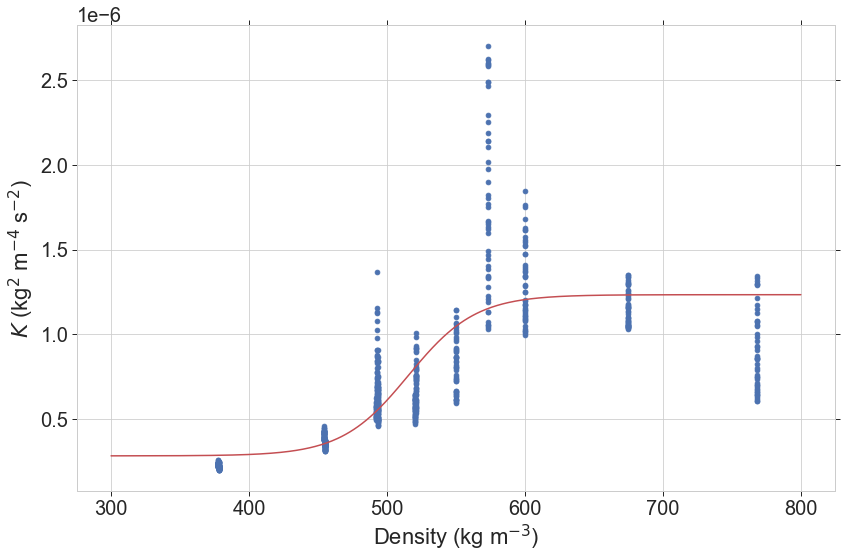

In [158]:
f1,a1=plt.subplots(figsize=(12,8))
a1.scatter(rhodata,kdata,label='visc data',color=palette[0])
# a1.plot(xa,k_log_cf_d(xa,poptd8[0],poptd8[1],poptd8[2],poptd8[3],poptd8[4]),label = '8')
L5,kL5,os5,d5,rhoc5 = 22.13, 3.95e-02, 1.00000000e+01, 0 ,511.2 #Set cutoff to 60 for K values.        
kM5 = k_log_cf_d(xa,L5,kL5,os5,d5,rhoc5)
a1.plot(xa,k_log_cf(xa,popt[0],popt[1],popt[2],popt[3]),label = 'cf',color=palette[3])
# a1.plot(xa,k_log_cf_d(xa,poptd9[0],poptd9[1],poptd9[2],poptd9[3],poptd9[4]),label = '9')
# a1.plot(xa,kM5,label='CFM')
a1.set_xlabel('Density (kg m$^{-3}$)')
a1.set_ylabel('$K$ (kg$^{2}$ m$^{-4}$ s$^{-2}$)')
# a1.set_ylim(0,100)
# a1.legend()
f1.savefig(f'/Users/maxstev/Documents/Grad_School/Manuscripts/Stevens_SPfirn/texfigures/K_derive_Q{int(abs(Q/1000))}.eps');

In [ ]:
# a1.plot(xa,k_log_cf(xa,44,3.3284e-2,9.65,542.8),label = 'works pretty well')
# a1.plot(xa,k_log_cf_d(xa,poptd1[0],poptd1[1],poptd1[2],poptd1[3],poptd1[4]),label = '1')
# a1.plot(xa,k_log_cf_d(xa,poptd2[0],poptd2[1],poptd2[2],poptd2[3],poptd2[4]),label = '2')
# a1.plot(xa,k_log_cf_d(xa,poptd3[0],poptd3[1],poptd3[2],poptd3[3],poptd3[4]),label = '3')
# a1.plot(xa,k_log_cf_d(xa,poptd4[0],poptd4[1],poptd4[2],poptd4[3],poptd4[4]),label = '4')
# a1.plot(xa,k_log_cf_d(xa,poptd5[0],poptd5[1],poptd5[2],poptd5[3],poptd5[4]),label = '5')
# a1.plot(xa,k_log_cf_d(xa,poptd6[0],poptd6[1],poptd6[2],poptd6[3],poptd6[4]),label = '6')
# a1.plot(xa,k_log_cf_d(xa,poptd7[0],poptd7[1],poptd7[2],poptd7[3],poptd7[4]),label = '7')

In [159]:
# curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
def logfun(xa,a,b,c):
    return a*b**(xa*c)


In [160]:
be, ce = 0.9,0
vco, vcod = curve_fit(logfun, rhodata, VarrTdata,p0=(1,be,ce))

In [161]:
dfp6[['pot_length_unfilt1','hole_length1']].iloc[0]-dfp6[['pot_length_unfilt1','hole_length1']].iloc[-1]

pot_length_unfilt1    0.082761
hole_length1          0.082761
dtype: float64

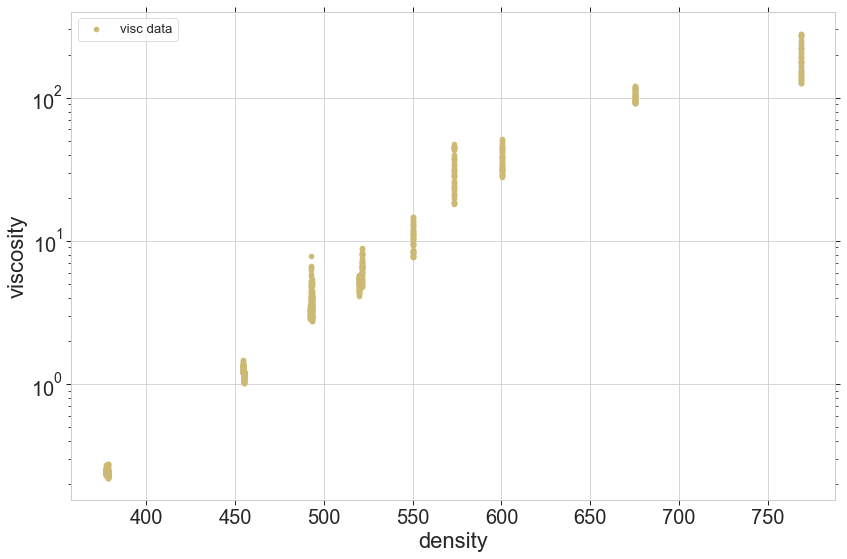

In [162]:
f1,a1=plt.subplots(figsize=(12,8))
a1.scatter(rhodata,VarrTdata,label='visc data',color=palette[-2])
# a1.scatter(rhodata,viscdata,label='visc data',color=palette[-2])
# a1.plot(xa,logfun(xa,*vco))
a1.set_xlabel('density')
a1.set_ylabel('viscosity')
# a1.set_ylim(0,100)
a1.set_yscale('log')
a1.legend()

In [163]:
print(kdata[:12].mean())
print(kdata[12:].mean())

2.3140193990966358e-07
7.267220005598864e-07


In [164]:
repmids=np.tile(midpoints,(tsl,1)).flatten('F')

Text(0, 0.5, 'viscosity')

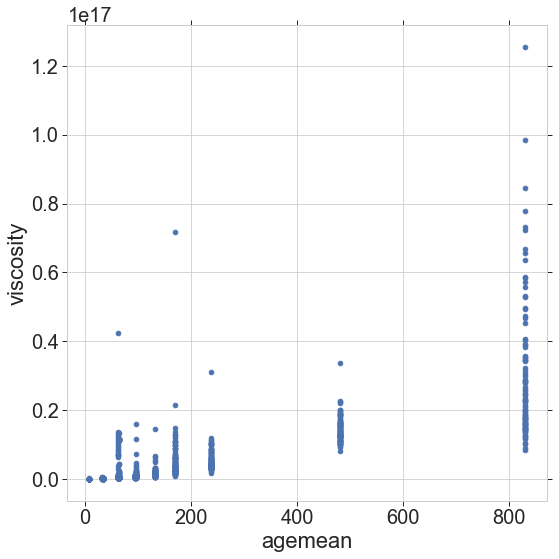

In [165]:
f1,a1=plt.subplots(figsize=(8,8))
zzz = 'agemean'
a1.scatter(visc_df[zzz],visc_df['visc'])
# a1.set_xlabel(z2r)
# a1.scatter(repmids,visc_df['visc'])
# a1.set_yscale('log')
a1.set_xlabel(zzz)
a1.set_ylabel('viscosity')

Text(0, 0.5, 'k')

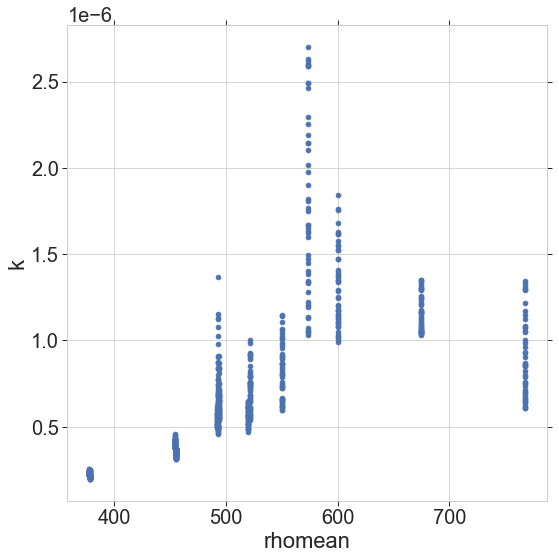

In [166]:
f1,a1=plt.subplots(figsize=(8,8))
a1.scatter(visc_df['rhoU'],visc_df['k'])
a1.set_xlabel(z2r)
a1.set_ylabel('k')

Text(0.5, 0, 'index')

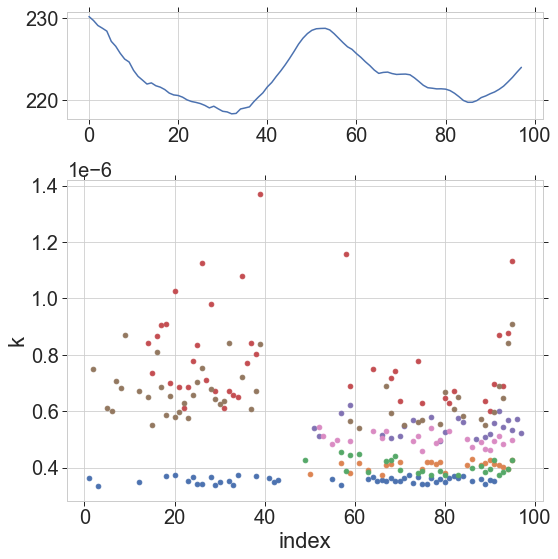

In [167]:
f1,(a1,a2)=plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1, 3]})
# a1.scatter(visc_df['rho'],visc_df['k'])
# [46:69,92]
# a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[0:tsl]['k'])
# a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl:tsl*2]['k'])
a1.plot(visc_df.iloc[0:tsl].index,visc_df.iloc[0:tsl]['T'])
# a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[46:tsl*3]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*3:tsl*4]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*4:tsl*5]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*5:tsl*6]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*6:tsl*7]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*7:tsl*8]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*8:tsl*9]['k'])
a2.scatter(visc_df.iloc[0:tsl].index,visc_df.iloc[tsl*9:tsl*10]['k'])
# a1.plot(visc_df.iloc[0:tsl].index,visc_df.iloc[46:69]['T'])
# a2.set_ylim(0,50)
a2.set_ylabel('k')
a2.set_xlabel('index')

In [168]:
import statsmodels.api as sm
Y = z2v_df['visc']
X = z2v_df['ageU']**n2
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
# olslist.append(results.params.date_ord*365.25)
# olsnames.append(name+'_'+fn)

In [169]:
results.rsquared
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   visc   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     803.9
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          1.55e-117
Time:                        15:20:16   Log-Likelihood:                -26171.
No. Observations:                 686   AIC:                         5.235e+04
Df Residuals:                     684   BIC:                         5.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.533e+15    5.2e+14     -4.873      0.0

In [173]:
z2v_df['holenum'].unique()

array(['9_7', '5_7', '7_8', '8_4', '4_3', '3_2', '2_6'], dtype=object)

In [178]:
z2v_df.loc[z2v_df['holenum']=='9_7']['ageU'].mean()

3518860552.341633

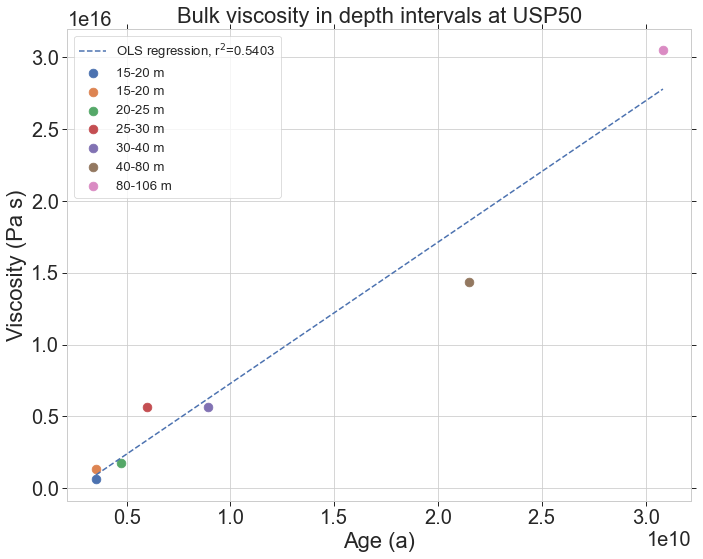

In [179]:
dep_ranges = ['15-20 m','15-20 m','20-25 m','25-30 m','30-40 m','40-80 m','80-106 m']
hnos = ['9_7', '5_7', '7_8', '8_4', '4_3', '3_2', '2_6']
f1,a1=plt.subplots(figsize=(10,8))
for ll, dr in enumerate(dep_ranges): 
#     print(z2v_df['ageU'].iloc[ll])
    age2plot = z2v_df.loc[z2v_df['holenum']==hnos[ll]]['ageU'].mean()
    v2plot = z2v_df.loc[z2v_df['holenum']==hnos[ll]]['visc'].mean()
    a1.scatter(age2plot,v2plot,s=75,label=dr)
#     a1.scatter((z2v_df['ageU'].iloc[ll])**n2,z2v_df.visc.iloc[ll],s=75,label=dr)
xx = np.array([(z2v_df['ageU'].iloc[0])**n2,(z2v_df['ageU'].iloc[-1])**n2])
a1.plot(xx, results.params.const + results.params['ageU'] * xx,'--',label='OLS regression, r$^{{2}}$={:.4f}'.format(results.rsquared)) 
a1.set_ylabel('Viscosity (Pa s)')
a1.set_xlabel('Age (a)')
a1.set_title('Bulk viscosity in depth intervals at USP50')
a1.legend()
f1.savefig('USP_deepviscosity.png')

<AxesSubplot:xlabel='TIMESTAMP'>

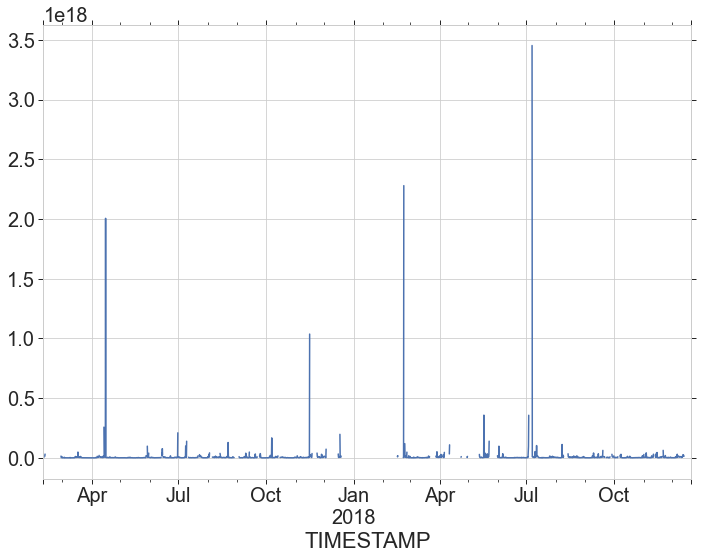

In [180]:
diff_visc['viscosity8_4'].plot()

In [181]:
visc_df.tail(10)

,holenum,dep,agemean,agemax,visc,rhomean,rhomax,T,stress,rhoU,ageU,term,k,arrT,modvisc,drho,moddrho,difper
1656,2_6,106.0,830.47986,977.100699,4.044677e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,NaN,7.790271e-15,3.495795e+16,-0.198638,-0.229827,-15.701205
1657,2_6,106.0,830.47986,977.100699,1.987547e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,7.464982e-07,7.790271e-15,3.495795e+16,-0.404231,-0.229827,43.144632
1658,2_6,106.0,830.47986,977.100699,3.842401e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,NaN,7.790271e-15,3.495795e+16,-0.209095,-0.229827,-9.914960
1659,2_6,106.0,830.47986,977.100699,1.489525e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,NaN,7.790271e-15,3.495795e+16,-0.539386,-0.229827,57.390939
1660,2_6,106.0,830.47986,977.100699,2.666145e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,1.001371e-06,7.790271e-15,3.495795e+16,-0.301345,-0.229827,23.732787
1661,2_6,106.0,830.47986,977.100699,1.782334e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,6.694226e-07,7.790271e-15,3.495795e+16,-0.450773,-0.229827,49.014922
1662,2_6,106.0,830.47986,977.100699,1.413411e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,NaN,7.790271e-15,3.495795e+16,-0.568432,-0.229827,59.568261
1663,2_6,106.0,830.47986,977.100699,2.804669e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,1.053399e-06,7.790271e-15,3.495795e+16,-0.286461,-0.229827,19.770211
1664,2_6,106.0,830.47986,977.100699,1.571770e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,NaN,7.790271e-15,3.495795e+16,-0.511162,-0.229827,55.038264
1665,2_6,106.0,830.47986,977.100699,1.865422e+16,768.337289,803.834785,222.15,-662706.584586,768.337289,3.083495e+10,2.662494e+22,7.006297e-07,7.790271e-15,3.495795e+16,-0.430695,-0.229827,46.638103


### Before running the following cells you need to scroll to the bottom to define dddf

Text(0.5, 0, 'Depth')

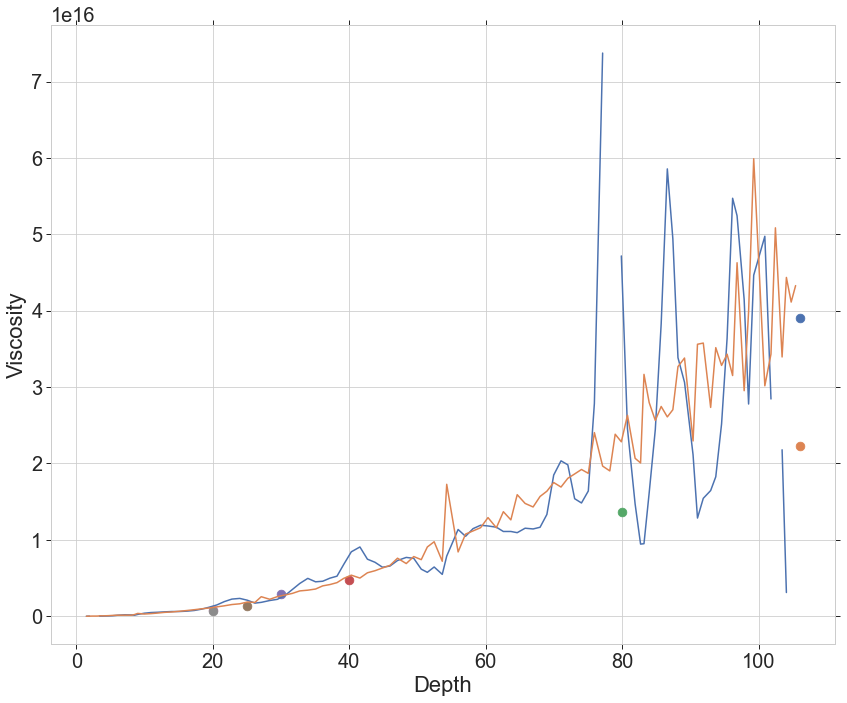

In [182]:
f1,a1=plt.subplots(figsize=(12,10))
a1.scatter(106,3.9e16,s=75)
a1.scatter(106,diff_visc['viscosity2_6'][:'2018-12-15'].median(),s=75)
a1.scatter(80,diff_visc['viscosity3_2'][:'2018-12-15'].median(),s=75)
a1.scatter(40,diff_visc['viscosity4_3'][:'2018-12-15'].median(),s=75)
a1.scatter(30,diff_visc['viscosity8_4'][:'2018-12-15'][:-1].median(),s=75)
a1.scatter(25,diff_visc['viscosity7_8'][:'2018-12-15'].median(),s=75)
a1.scatter(20,diff_visc['viscosity5_7'][:'2018-12-15'].median(),s=75)
a1.scatter(20,diff_visc['viscosity9_7'][:'2018-12-15'].median(),s=75)
a1.plot(dddf['dep'],dddf['vSS_sm'])
a1.plot(dddf['dep'],dddf['vSS_f'])
a1.set_ylabel('Viscosity')
a1.set_xlabel('Depth')


In [183]:
diff_hole_labels = visc_df.holenum.unique()

In [184]:
sl_s = (df_dc.index[-1]-df_dc.index[0]).value/1e9 #series length in seconds
mean_hole_visc2 = [-1*(visc_df[visc_df.holenum == kk].stress.median())/(2*(df_dc['strain{}'.format(kk)][-1])/sl_s) for kk in diff_hole_labels]

In [185]:
dfp4[['hole_length8','hole_length4']].iloc[[0,-1]]#-dfp4[['hole_length8','hole_length4']].iloc[-1]

,hole_length8,hole_length4
TIMESTAMP,,
2017-02-09 12:00:00,24.649893,29.569887
2018-12-21 00:00:00,24.464676,29.381548


In [186]:
mean_hole_visc = [visc_df[visc_df.holenum == xx].visc.median() for xx in visc_df.holenum.unique()]
# mean_hole_visc[-1] = visc_df.loc[236].visc

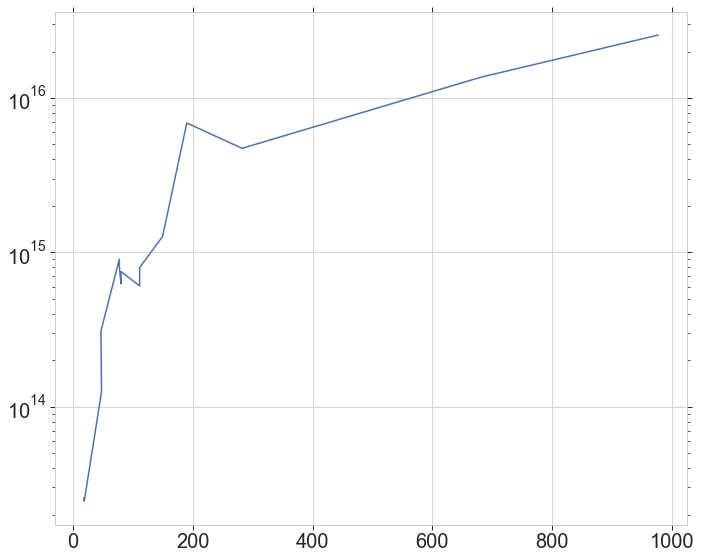

In [187]:
f1,a1=plt.subplots()
a1.semilogy(amaxlist[:],mean_hole_visc2[:],label='max')
# a1.scatter(ameanlist,mean_hole_visc,label='max')

In [188]:
len(repmids)

1666

In [189]:
len(visc_df['visc'])

1666

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


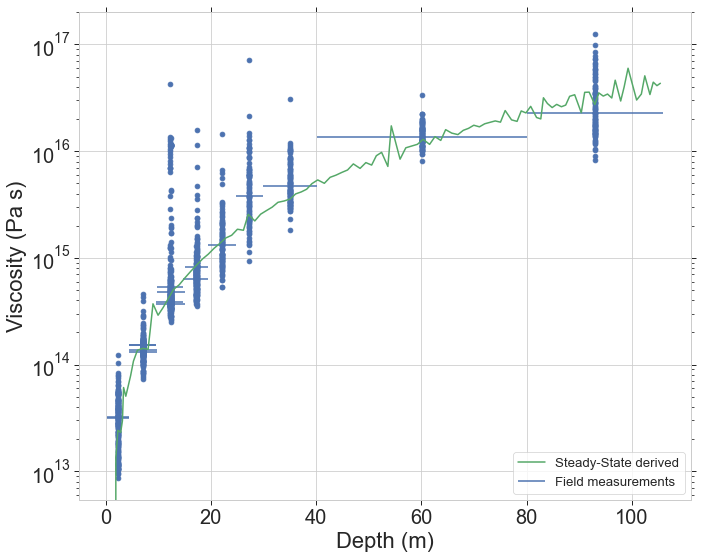

In [190]:
# htda
# hbda
f1,a1=plt.subplots()
dcol = 0
a1.hlines(mean_hole_visc,htda,hbda,label='Field measurements',color=palette[dcol])
# a1.hlines(mean_hole_visc2,htda,hbda,label='Field measurements',color='k')
a1.scatter(repmids,visc_df['visc'],color=palette[dcol])
# a1.plot(dddf['dep'],dddf['vSS_sm'],label='Steady-State derived')
a1.plot(dddf['dep'],dddf['vSS_f'],label='Steady-State derived',color=palette[2])
# a1.step(hbda,mean_hole_visc)
a1.set_yscale('log');
a1.set_ylabel('Viscosity (Pa s)');
a1.set_xlabel('Depth (m)');
a1.legend();
f1.savefig('SP_viscosity_SSvData.eps')
# f1.savefig('/Users/maxstev/Documents/Grad_School/Manuscripts/Stevens_SPfirn/texfigures/SP_viscosity_SSvData.eps')

In [191]:
dCO =dddf.copy()
dCO['vSS_f'][dCO['vSS_f']==0]=np.nan
dCO['Vmean'] = np.ones_like(dCO['stress'])
ssHD = np.array((0,4.4,10,15,20,25,30,40,80,106))
SSvmean = np.zeros(len(ssHD)-1)
for ii,DD in enumerate(ssHD):
    if ii==len(ssHD)-1:
        continue
    else:
        dCO.loc[(dCO['dep']>ssHD[ii]) & (dCO['dep']<ssHD[ii+1]),'Vmean'] = dCO[(dCO['dep']>ssHD[ii]) & (dCO['dep']<ssHD[ii+1])]['vSS_f'].median()
        SSvmean[ii] = dCO[(dCO['dep']>ssHD[ii]) & (dCO['dep']<ssHD[ii+1])]['vSS_f'].mean()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


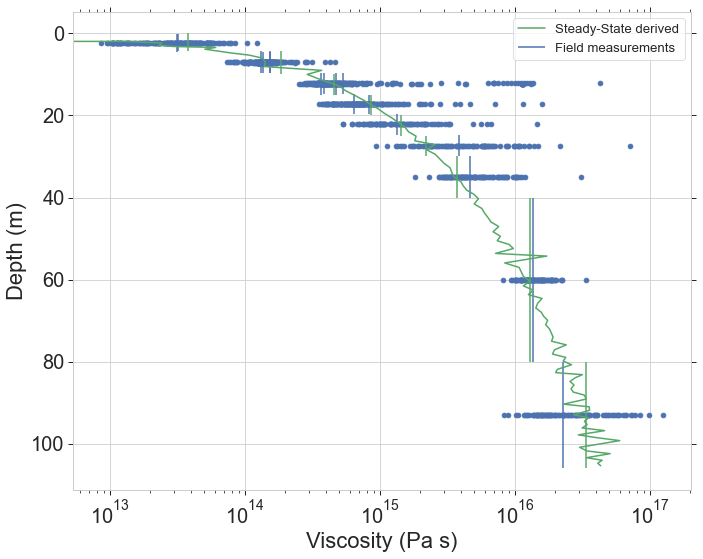

In [192]:
f1,a1=plt.subplots()
dcol = 0
a1.vlines(mean_hole_visc,htda,hbda,label='Field measurements',color=palette[dcol])
# a1.hlines(mean_hole_visc2,htda,hbda,label='Field measurements',color='k')
a1.scatter(visc_df['visc'],repmids,color=palette[dcol])
# a1.plot(dddf['dep'],dddf['vSS_sm'],label='Steady-State derived')
a1.plot(dddf['vSS_f'],dddf['dep'],label='Steady-State derived',color=palette[2])
a1.vlines(SSvmean,ssHD[0:-1],ssHD[1:],color=palette[2])
# a1.step(hbda,mean_hole_visc)
a1.set_xscale('log');
a1.set_xlabel('Viscosity (Pa s)');
a1.set_ylabel('Depth (m)');
a1.invert_yaxis()
a1.legend();
f1.savefig('SP_viscosity_SSvData.eps')
# f1.savefig('/Users/maxstev/Documents/Grad_School/Manuscripts/Stevens_SPfirn/texfigures/SP_viscosity_SSvData.eps')

In [195]:
thenames

['HLdynamic', 'Ligtenberg2011', 'Li2015', 'Crocus', 'GSFC2020', 'MaxSP']

In [193]:
def get_plotdeets(modelname):
    palette = sns.color_palette()
    if modelname =='data':
        colo = 'black'
        legname = 'Data'
    elif modelname =='HLdynamic':
        colo = palette[1]
        legname = 'Herron & Langway (1980)'
    elif modelname == 'MaxSP':
        colo = palette[3]
        legname = 'This work'
    elif modelname == 'Ligtenberg2011':
        colo = palette[2]
        legname = 'Ligtenberg et al. (2011)'
    elif modelname == 'GSFC2020':
        colo = palette[0]
        legname = 'GSFC (Medley et al., 2020)'
    elif modelname == 'Li2015':
        colo = palette[4]
        legname = 'Li & Zwally (2015)'
    elif modelname == 'Crocus':
        colo = palette[5]
        legname = 'Crocus (Vionnet et al. 2012)' 
    return colo, legname

In [224]:
d['SP50']['MET']['GSFC2020']['rdaily']['visc_trun']

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7096029e+08, 1.6153273e+10, 2.3672752e+10, ..., 4.5394368e+16,
        4.5400764e+16, 4.5407159e+16],
       [1.6232560e+08, 1.6264398e+10, 2.3772129e+10, ..., 4.5394755e+16,
        4.5401150e+16, 4.5407545e+16],
       ...,
       [1.2783808e+08, 7.1612850e+10, 2.6673057e+11, ..., 4.5691812e+16,
        4.5698276e+16, 4.5704740e+16],
       [1.7979251e+08, 7.3117606e+10, 2.5655997e+11, ..., 4.5692396e+16,
        4.5698860e+16, 4.5705324e+16],
       [1.9281021e+08, 7.3192948e+10, 2.4748732e+11, ..., 4.5692826e+16,
        4.5699290e+16, 4.5705753e+16]], dtype=float32)

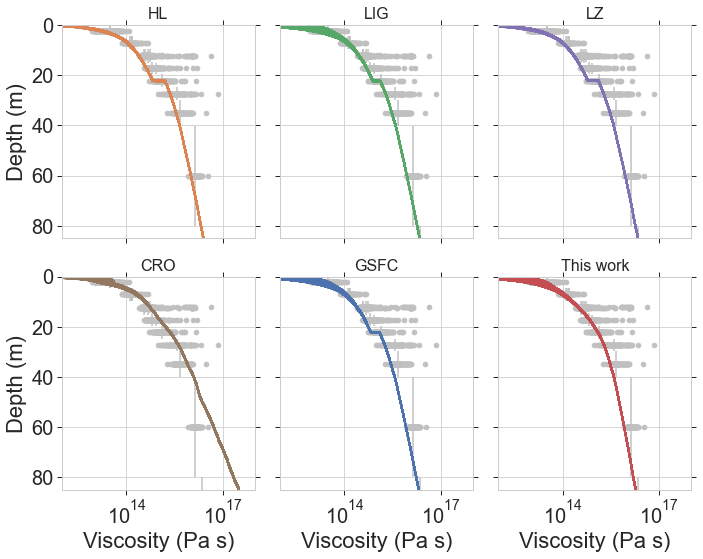

In [234]:
f1,axes=plt.subplots(2,3,sharex=True,sharey=True)
shortnames=['HL','LIG','LZ','CRO','GSFC','This work']
dcol = 'silver'
axes = axes.ravel()
for i2,vv in enumerate(axes):
    axes[i2].vlines(mean_hole_visc,htda,hbda,label='Field measurements',color=dcol)
    axes[i2].scatter(visc_df['visc'],repmids,color=dcol)
    name = thenames[i2]
#     print(name)
    colo, legname = get_plotdeets(name)
    for ijk in range(len(d['SP50']['MET'][name]['rdaily']['visc_trun'])):
        axes[i2].plot(d['SP50']['MET'][name]['rdaily']['visc_trun'][ijk,:],d['SP50']['MET'][name]['rdaily']['dep_trun'][ijk,:],color=colo)
    # a1.step(hbda,mean_hole_visc)
    axes[i2].set_xscale('log');
#     axes[i2].set_xlabel('Viscosity (Pa s)');
#     axes[i2].set_ylabel('Depth (m)');
    axes[i2].set_xlim(1e12,1e18)
    axes[i2].set_ylim(0,85)
    axes[i2].invert_yaxis()
    axes[i2].set_title(shortnames[i2],fontsize=16)
    if ((i2==0) or (i2==3)):
        axes[i2].set_ylabel('Depth (m)')
    if i2>=3:
        axes[i2].set_xlabel('Viscosity (Pa s)')
#     axes[i2].legend();
f1.savefig('SP_viscosity_SSvData.pdf')
f1.savefig('/Users/maxstev/Documents/Grad_School/Manuscripts/Stevens_SPfirn/texfigures/SP_viscosity_SSvData_model.pdf')

In [ ]:
2017-1021

In [ ]:
usp50_ts[151:743].bdot_ie.mean()*1.08

In [ ]:
usp50_ts.iloc[200]

In [ ]:
# f1, ((a1,a2),(a3,a4)) = plt.subplots(2,2,gridspec_kw={'height_ratios': [2.5, 1]},figsize = (16,10))
# plt.subplots_adjust(hspace=0.0)
# a1.plot(usp50_ts['tau'],usp50_ts['Depth'],color=palette[0])
# a1.set_ylabel('Depth (m)')
# a1.set_xlim(0,usp50_ts['tau'].max())
# a1.set_ylim(0,usp50_ts['Depth'].max())
# a1.set_xticklabels([])
# a1.invert_yaxis()
# a2.plot(usp50_ts['density'],usp50_ts['Depth'],color=palette[2])
# # a1.get_shared_x_axes().join(a1, a2)
# a2.set_ylim(0,usp50_ts['Depth'].max())
# a2.set_xlim(300,820)
# a2.set_xlabel('Density (kg m$^{-3}$)')
# a2.invert_yaxis()
# # a1.tick_params(labelcolor='w')#, top=False, bottom=False, left=False, right=False)
# a3.plot(usp50_ts['tau'][2:],usp50_ts['bdot_ie'][2:],color=palette[1])
# a3.set_xlim(0,usp50_ts['tau'].max())
# a3.set_ylabel('Accumulation \n (m ice eq.)')
# a3.set_xlabel('Age (relative to 2017)')
# a4.axis('off')
# f1.set_tight_layout(True)

In [ ]:
Y = usp50_ts['bdot_ie'][150:]
X = usp50_ts.index[150:]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [ ]:
results.summary()

In [ ]:
69.31/917

In [ ]:
(usp50_ts['bdot_ie'][2:]).rolling(10).mean().plot()

In [ ]:
usp50_ts['bdot_kg'] = usp50_ts['bdot_ie']*917
txp = 0.85
typ = 0.9
fig = plt.figure(figsize = (16,10))
fig.set_tight_layout(False)
gs = mpl.gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.001,width_ratios=[1,1],height_ratios=[2.2,1]) # 2x2 grid
a1 = fig.add_subplot(gs[0, 0]) # first row, first col
a2 = fig.add_subplot(gs[0, 1]) # first row, second col
a3 = fig.add_subplot(gs[1, 0]) # full second row
a1.plot(usp50_ts['tau'],usp50_ts['Depth'],color=palette[0])
# a1.plot(usp50_ts['tau'],usp50_ts['Depth'],'.',color=palette[0])
a1.set_ylabel('Depth (m)')
a1.set_xlim(0,usp50_ts['tau'].max())
a1.set_ylim(0,usp50_ts['Depth'].max()+5)
a1.set_xticklabels([])
a1.invert_yaxis()
a1ylim = a1.get_ylim()
a1ty = (a1ylim[1] - a1ylim[0])*typ + a1ylim[0]
a1xlim = a1.get_xlim()
a1tx = (a1xlim[1] - a1xlim[0])*txp + a1xlim[0]
a1.text(a1tx,a1ty,'(a)',fontsize=22)
# a1.text(900,10,'(a)',fontsize=22)
a2.plot(usp50_ts['density'],usp50_ts['Depth'],color=palette[2])
# a1.get_shared_x_axes().join(a1, a2)
a2.set_ylim(0,usp50_ts['Depth'].max()+5)
a2.set_xlim(300,820)
a2.set_xlabel('Density (kg m$^{-3}$)')
a2.yaxis.tick_right()
a2.yaxis.set_ticks_position('both')
a2.invert_yaxis()
a2ylim = a2.get_ylim()
a2ty = (a2ylim[1] - a2ylim[0])*typ + a2ylim[0]
a2xlim = a2.get_xlim()
a2tx = (a2xlim[1] - a2xlim[0])*txp + a2xlim[0]
a2.text(a2tx,a2ty,'(b)',fontsize=22)
# a2.text(758,10,'(b)',fontsize=22)
# a1.tick_params(labelcolor='w')#, top=False, bottom=False, left=False, right=False)
a3.plot(usp50_ts['tau'][2:],usp50_ts['bdot_kg'][2:],color=palette[1])
a3.plot(usp50_ts['tau'][2:],(usp50_ts['bdot_kg'][2:]).rolling(10).mean(),color=palette[3])
a3.set_xlim(0,usp50_ts['tau'].max())
a3.set_ylabel('Accumulation \n (kg m$^{-2}$ a$^{-1}$)')
a3.set_xlabel('Age (relative to 2017)');
a3.tick_params(axis="x", direction="inout",length=8,width=1,color='k');
a3.spines["top"].set_linewidth(1.5)
a3.spines["top"].set_color('k')
a3ylim = a3.get_ylim()
a3ty = (a3ylim[1] - a3ylim[0])*0.82 + a3ylim[0]
a3xlim = a3.get_xlim()
a3tx = (a3xlim[1] - a3xlim[0])*txp + a3xlim[0]
a3.text(a3tx,a3ty,'(c)',fontsize=22)
# a3.text(900,0.14,'(c)',fontsize=22)
# a3b = a3.secondary_xaxis("top");
# a3b.tick_params(axis="x", direction="inout",length=8,width=1,color='k');
# a3b.set_xticklabels([]);
# a4.axis('off')
fig.savefig('SP_DD_DA_BDOT.eps')
fig.savefig('/Users/maxstev/Documents/Grad_School/Manuscripts/Stevens_SPfirn/texfigures/SP_DD_DA_BDOT.eps')

In [ ]:
# f1,a1=plt.subplots()
# dcol = 0
# a1.hlines(mean_hole_visc,htda,hbda,label='Field measurements',color=palette[dcol])
# # a1.hlines(mean_hole_visc2,htda,hbda,label='Field measurements',color='k')
# a1.scatter(repmids,visc_df['visc'],color=palette[dcol])
# # a1.plot(dddf['dep'],dddf['vSS_sm'],label='Steady-State derived')
# a1.plot(dddf['dep'],dddf['vSS_f'],label='Steady-State derived',color=palette[2])
# # a1.step(hbda,mean_hole_visc)
# a1.set_yscale('log');
# a1.set_ylabel('Viscosity');
# a1.set_xlabel('Age');
# a1.legend();
# f1.savefig('SP_viscosity_SSvData_age.eps')

In [ ]:
f1,a1=plt.subplots(figsize=(12,10))
a1.scatter(106,3.9e16,s=75)
a1.scatter(106,diff_visc['viscosity2_6'][:'2018-12-15'].median(),s=75)
a1.scatter(80,diff_visc['viscosity3_2'][:'2018-12-15'].median(),s=75)
a1.scatter(40,diff_visc['viscosity4_3'][:'2018-12-15'].median(),s=75)
a1.scatter(30,diff_visc['viscosity8_4'][:'2018-12-15'][:-1].median(),s=75)
a1.scatter(25,diff_visc['viscosity7_8'][:'2018-12-15'].median(),s=75)
a1.scatter(20,diff_visc['viscosity5_7'][:'2018-12-15'].median(),s=75)
a1.scatter(20,diff_visc['viscosity9_7'][:'2018-12-15'].median(),s=75)
a1.plot(dddf['dep'],dddf['vSS_sm'])
a1.plot(dddf['dep'],dddf['vSS_f'])
a1.set_ylabel('Viscosity')
a1.set_xlabel('Depth')

In [ ]:
diff_visc['viscosity2_6'][:'2018-12-15'].resample('28D').median().median()

In [ ]:
# %matplotlib notebook
f1,a1=plt.subplots(figsize=(12,10))
diff_visc['viscosity2_6'][:'2018-12-15'].resample('28D').median().plot(ax=a1,drawstyle='steps')
diff_visc['viscosity3_2'][:'2018-12-15'].resample('28D').median().plot(ax=a1,drawstyle='steps')
diff_visc['viscosity4_3'][:'2018-12-15'].resample('28D').median().plot(ax=a1,drawstyle='steps')
diff_visc['viscosity8_4'][:'2018-12-15'].resample('28D').median()[:-1].plot(ax=a1,drawstyle='steps')
diff_visc['viscosity7_8'][:'2018-12-15'].resample('28D').median().plot(ax=a1,drawstyle='steps')
# diff_visc.resample('21D').median().plot(ax=a1)
# a1.set_ylim(1e14,3e16)

In [ ]:
visc_df.tail(10)

In [ ]:
dfp4

In [ ]:
# dfp4[['hole_length2','hole_length6']]-dfp4[['hole_length2','hole_length6']].iloc[0]
diff26 = (dfp4['hole_length2']-dfp4['hole_length2'].iloc[0]) - (dfp4['hole_length6']-dfp4['hole_length6'].iloc[0])
sss = (diff26.index[-1]-diff26.index[0]).value/1e9
sr26 = -1*(diff26[-1]/26)/sss
v26 = np.min(stress_holebot)/(2*sr26)

In [ ]:
v26

In [ ]:
df_dc

In [ ]:
sr26

In [ ]:
sss

In [ ]:
sr26

In [ ]:
diff_viscZ1 = diff_visc.iloc[:,:-7].copy()
diff_viscZ1 = diff_viscZ1.resample(resamp).median()

In [ ]:
diff_viscZ2 = diff_visc.iloc[:,-7:].copy()
for kk in diff_viscZ2.keys():
    diff_viscZ2.loc[:,kk] = diff_viscZ2[kk].median()
diff_viscZ2 = diff_viscZ2.resample(resamp).mean()

In [ ]:
f1,a1=plt.subplots(figsize=(10,16))
# diff_visc['viscosity26'][:'2018-12-15'].plot(ax=a1)
# diff_visc.resample(resamp).median().plot(ax=a1,drawstyle='steps',logy=True)
diff_viscZ1.plot(ax=a1,drawstyle='steps')#,logy=True)
# diff_viscZ2.plot(ax=a1,drawstyle='steps',logy=True)
# a1.set_ylim(1e14,3e16)

# ---------------------------------------------
# Age and rho for viscosity analysis
# ---------------------------------------------

In [ ]:
usp50_ts['bdot_kg'] = usp50_ts['bdot_ie']*917
usp50_ts['stress']=usp50_ts['mass'].cumsum()*9.8

In [ ]:
f1,a1=plt.subplots(figsize=(8,6))
a1.plot(usp50_ts.density,usp50_ts.Depth)
a1.invert_yaxis()
a1.set_ylabel('depth')
a1.set_xlabel('Density')

In [ ]:
f1,a1=plt.subplots(figsize=(8,6))
a1.plot(usp50_ts.density,usp50_ts.tau**(1/2))
a1.invert_yaxis()
a1.set_ylabel('Age')
a1.set_xlabel('Density')

In [ ]:
f1,a1=plt.subplots(figsize=(8,6))
a1.semilogx(usp50_ts.stress,usp50_ts.density)
# a1.invert_yaxis()
a1.set_ylabel('density')
a1.set_xlabel(r'$\sigma$');

In [ ]:
z1_vmed = np.array([visc_df.iloc[tsl*kk:tsl*(kk+1)]['visc'].median() for kk in range(l2)])
z1_vmean = np.array([visc_df.iloc[tsl*kk:tsl*(kk+1)]['visc'].mean() for kk in range(l2)])

In [ ]:
# f1,a1 = plt.subplots()
# a1.scatter(z1_diff_meanage**2,z1_vmed,s=75)
# a1.scatter(z1_diff_meanage**1.1,z1_vmean,s=75)
# a1.scatter(z1_diff_maxage**1.1,z1_vmed,s=75)
# a1.scatter(z1_diff_maxage**1.1,z1_vmean,s=75)

# ------------------------------------------------------------------
#    COMPACTIVE VISCOSITY, STEADY STATE
# ------------------------------------------------------------------

$Ag \eta \ln(\frac{\rho_{2}}{\rho_{1}}) = \frac{1}{2} (\sigma_{2}^{2} - \sigma_{1}^{2})$

From Maeno and Narita

In [61]:
def den_fit(dep,a,b,c):
    return a*dep**(b) + c

pp1, pp1cov = curve_fit(den_fit, dep_c, den_c,p0=np.array([40,0.5,400]))

In [62]:
dddf = pd.DataFrame({'dep':dep_c,'den':den_c,'den_sm':den_c,'stress':stress_cu})
dddf.loc[:,'den_sm']=dddf.den.rolling(12,win_type='hamming',center=True).mean()
dddf['den_sm'][np.isnan(dddf['den_sm'])] = dddf['den'][np.isnan(dddf['den_sm'])]
dddf['den_fit'] = den_fit(dddf['dep'],pp1[0],pp1[1],pp1[2])
layer_mass_sm = layer_thickness*dddf['den_sm']
layer_mass_f = layer_thickness*dddf['den_fit']
mass_sm = np.cumsum(layer_mass_sm)
mass_f = np.cumsum(layer_mass_f)
stress_cu_sm = mass_sm * 9.8
stress_cu_f = mass_f * 9.8
dddf['stress_sm']= stress_cu_sm
dddf['stress_f']= stress_cu_f


In [65]:
A=69.37 #kg/m^2/a
g=9.8
den_f1 = dddf['den_fit'].values
den_sm = dddf['den_sm'].values
dddf['vSS_sm'] = np.append(0,1/2*(np.diff(dddf['stress_sm'].values**2)) / np.log(den_sm[1:]/den_sm[0:-1])/g/A/2)*SPY
dddf['vSS_sm'][dddf['vSS_sm']<0]=np.nan
dddf['vSS_f'] = np.append(0,1/2*(np.diff(dddf['stress_f'].values**2)) / np.log(den_f1[1:]/den_f1[0:-1])/g/A/2)*SPY
dddf['vSS_f'][dddf['vSS_f']<0]=np.nan

In [66]:
xar = np.arange(0,110)
# den_f = den_fit(xar,pp1[0],pp1[1],pp1[2])
# layer_mass_f = den_f.copy()
# mass_f= np.cumsum(layer_mass_f)
# stress_cu_f= mass_f * 9.8
# vSS_f = (1/2*(np.diff(stress_cu_f**2))) / (np.log(den_f[1:]/den_f[0:-1])*g*A*2) * SPY

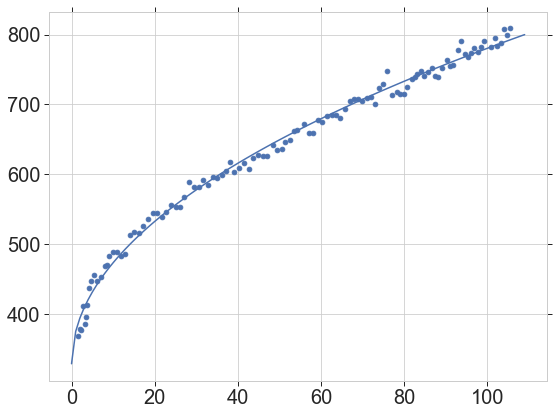

In [67]:

f1,a1 =plt.subplots(figsize=(8,6))
# a1.plot(smooth(den_c)[1:],dep_c)
# a1.invert_yaxis()
a1.scatter(dep_c,den_c)
a1.plot(xar,den_fit(xar,pp1[0],pp1[1],pp1[2]))

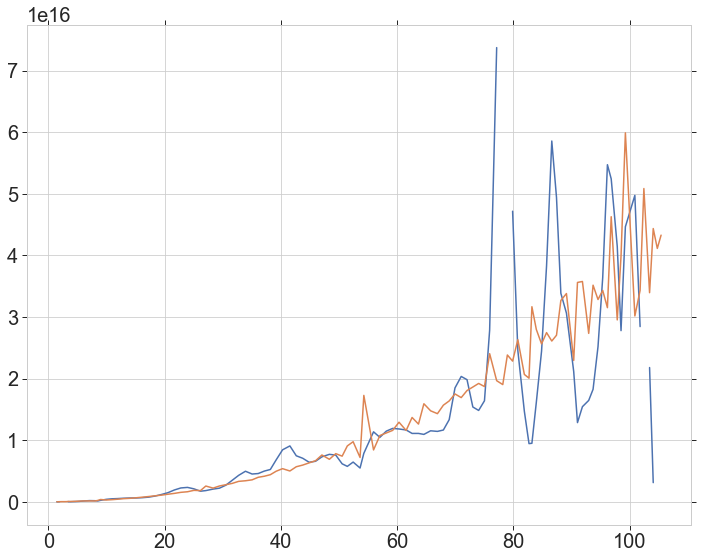

In [68]:
f1,a1=plt.subplots()
# a1.plot(dddf['dep'],dddf['stress'])
a1.plot(dddf['dep'],dddf['vSS_sm'])
a1.plot(dddf['dep'],dddf['vSS_f'])